In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import *

import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances_argmin

from bct.algorithms.modularity import *
%matplotlib inline

In [12]:
df = pd.read_excel('./swn_cgi.xlsx')
df = df.dropna(axis=0)
df= df.reset_index(drop=True)

df['CGISCHSO_R'] = df['CGISCHSO'].rank(method='average', ascending=True)/794
df['SWN_Total_R'] = df['SWN_Total'].rank(method='average', ascending=True)/794

In [13]:
X = df[["CGISCHSO_R", "SWN_Total_R"]].values

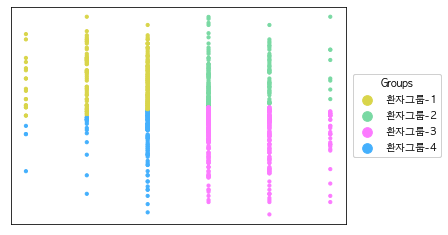

In [5]:
plt.rcParams['font.family'] = 'AppleGothic'

clustering = pd.DataFrame(AgglomerativeClustering(n_clusters = 4, linkage = 'complete').fit_predict(X))
cmap = matplotlib.colors.ListedColormap(['#FC7AFF','#D9D54A','#79D9A3', '#44B0FD' ])
labels = ["환자그룹-1","환자그룹-2","환자그룹-3","환자그룹-4"]

fig, ax = plt.subplots()
scatter= plt.scatter(df["CGISCHSO"], df["SWN_Total"], c=clustering[0], s=10,cmap=cmap)
handles = [  scatter.legend_elements()[0][1], scatter.legend_elements()[0][2],scatter.legend_elements()[0][0], scatter.legend_elements()[0][3],]
legend1 = ax.legend(handles, labels, loc="center right", bbox_to_anchor=(1.3,0.5), markerscale=1.6, scatterpoints=1, title="Groups")
ax.add_artist(legend1)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

df['hier'] = clustering[0]

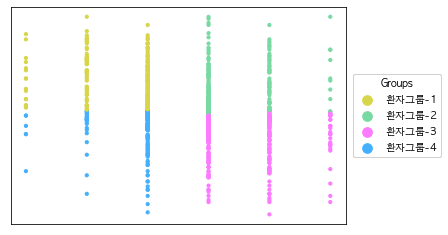

In [6]:
cmap = matplotlib.colors.ListedColormap(['#79D9A3', '#FC7AFF','#D9D54A','#44B0FD' , ])
labels = ["환자그룹-1","환자그룹-2","환자그룹-3","환자그룹-4"]

fig, ax = plt.subplots()

k_means = KMeans(init='k-means++', n_clusters=4, n_init=10, random_state=1).fit(X)

plt.scatter(df["CGISCHSO"], df["SWN_Total"], c=k_means.labels_, s=10 ,cmap=cmap)
handles = [ scatter.legend_elements()[0][1], scatter.legend_elements()[0][2], scatter.legend_elements()[0][0],  scatter.legend_elements()[0][3], ]
legend1 = ax.legend(handles, labels, loc="center right", bbox_to_anchor=(1.3,0.5), markerscale=1.6, scatterpoints=1, title="Groups")
ax.add_artist(legend1)
ax = plt.gca()

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

df['kmeans'] = k_means.labels_
df.to_excel('clustering.xlsx', index = False)

In [7]:
data0 = pd.read_csv('./Desktop/hier000.csv', index_col='Unnamed: 0').values
community0 = community_louvain(data0, gamma=1.3, ci=None, B='negative_sym', seed=None)[0]
community0

array([3, 5, 5, 3, 5, 2, 9, 2, 5, 1, 1, 3, 7, 5, 5, 9, 7, 2, 3, 1, 7, 1,
       1, 1, 7, 1, 3, 5, 5, 5, 5, 5, 7, 1, 2, 2, 2, 6, 3, 3, 5, 3, 2, 6,
       6, 5, 7, 3, 3, 7, 8, 3, 3, 5, 5, 3, 7, 3, 5, 4, 2, 9, 4, 6, 6, 6,
       4, 6, 6, 7, 5, 7, 7, 4, 7, 2, 8, 8, 8, 8, 4, 3, 2, 9, 9, 8, 9, 8,
       9, 9])

In [8]:
data1 = pd.read_csv('./Desktop/hier001.csv', index_col='Unnamed: 0').values
community1 = community_louvain(data1, gamma=1.3, ci=None, B='negative_sym', seed=None)[0]
community1

array([ 4,  1,  1,  4,  1,  8,  8,  8,  1,  1,  8,  9,  7,  4,  3,  8,  2,
        8,  4,  9,  5, 10,  2,  8,  7,  1,  4,  1,  3,  3,  1,  1,  3,  2,
        8,  8,  8,  5,  9,  6,  1,  4,  8,  6,  6,  1,  7,  9,  9,  7, 10,
        4,  9,  1,  1,  4,  2,  4,  3,  5,  5, 10,  8,  6,  6,  6,  8,  8,
        5,  7, 10,  3,  7,  8,  7,  8,  3,  6,  3,  1,  8,  9,  8,  5, 10,
        2, 10,  1, 10, 10])

In [9]:
data2 = pd.read_csv('./Desktop/hier002.csv', index_col='Unnamed: 0').values
community2 = community_louvain(data2, gamma=1.3, ci=None, B='negative_sym', seed=None)[0]
community2

array([ 1,  2,  2,  1,  9,  3,  8,  8,  3,  3,  2,  1,  6,  3,  4,  8, 10,
        3,  3,  3, 10,  4,  3,  3,  6,  7,  1,  3,  4,  4,  7,  7,  7,  3,
        8,  8,  8,  9,  1,  1,  7,  1,  8,  9,  9,  7,  1,  1,  1,  6,  4,
        1,  1,  4,  7,  1,  7,  1,  4,  8,  8,  5,  5,  9,  9,  9,  5,  9,
        9,  6,  7, 10,  1,  7,  6,  8,  4,  7,  4,  3,  5,  1, 10, 10, 10,
        7, 10, 10, 10, 10])

In [10]:
data3 = pd.read_csv('./Desktop/hier003.csv', index_col='Unnamed: 0').values
community3 = community_louvain(data3, gamma=1.3, ci=None, B='negative_sym', seed=None)[0]
community3

array([1, 3, 3, 1, 3, 5, 5, 5, 3, 4, 3, 1, 4, 3, 3, 5, 7, 5, 1, 3, 4, 3,
       4, 3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 9, 1, 1, 9, 1, 5, 6,
       9, 9, 4, 1, 1, 4, 1, 1, 1, 3, 3, 1, 7, 1, 3, 5, 5, 2, 8, 6, 9, 6,
       8, 2, 4, 4, 9, 4, 4, 8, 7, 5, 9, 7, 9, 8, 8, 1, 2, 2, 2, 7, 9, 9,
       2, 2])

In [11]:
data4 = pd.read_csv('./Desktop/hier004.csv', index_col='Unnamed: 0').values
community4 = community_louvain(data4, gamma=1.3, ci=None, B='negative_sym', seed=None)[0]
community4

array([ 6,  1,  1,  6,  4,  3,  3,  3,  2,  2,  4,  6,  9,  4,  5,  3,  5,
        3,  6,  8,  5,  5,  5,  8,  9,  2,  6,  2, 10, 10, 10,  2,  5,  4,
        3,  2,  3,  3,  6,  6,  2,  6,  3,  7,  2,  2,  6,  6,  6,  9,  4,
        6,  6,  2,  2,  6, 10,  6,  5,  3,  2,  3,  8,  7,  7,  7,  8,  8,
        2,  9, 10,  5,  9,  8,  6,  3, 10, 10, 10,  5,  8,  6,  3,  3,  3,
       10, 10,  2,  3,  5])